# Preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

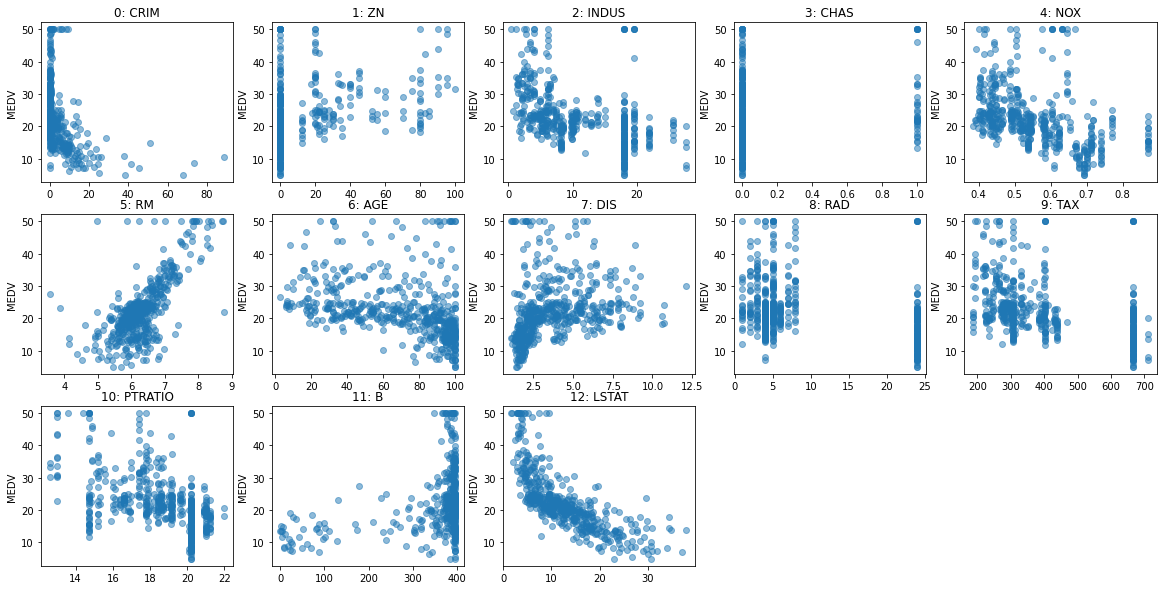

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

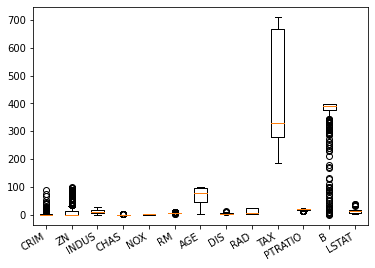

In [7]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right");

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

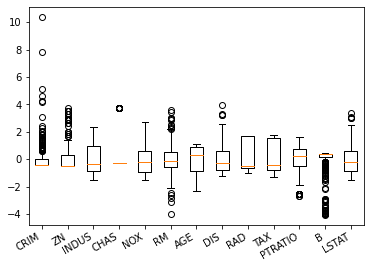

In [9]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right");

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.7066272660046313

In [11]:
knr.score(X_test, y_test)

0.4616380924610112

In [12]:
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.fit(X_train_scaled, y_train)
knr_scaled.score(X_train_scaled, y_train)

0.849576948978109

In [13]:
X_test_scaled = scaler.transform(X_test)
knr_scaled.score(X_test_scaled, y_test)

0.606952770711171

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7951320840066728

In [15]:
rf_scaled = RandomForestRegressor(random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.7954056384168993

# Categorical Variables

In [16]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,salary,boro
0,103,Manhattan
1,89,Queens
2,142,Manhattan
3,54,Brooklyn
4,63,Brooklyn
5,219,Bronx


In [17]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
categorical = df.dtypes == object
categorical

salary    False
boro       True
dtype: bool

In [19]:
~categorical

salary     True
boro      False
dtype: bool

In [20]:
ct = make_column_transformer((OneHotEncoder(), categorical),
                             (StandardScaler(), ~categorical))
ct.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        ,  0.        , -0.15514441],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.4057623 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.54300544],
       [ 0.        ,  1.        ,  0.        ,  0.        , -1.03230704],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87119554],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.92140385]])

In [21]:
ct = make_column_transformer((OneHotEncoder(sparse=False), categorical))
ct.fit_transform(df)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [22]:
ct = make_column_transformer((OneHotEncoder(), categorical),
                             remainder='passthrough')
ct.fit_transform(df)

array([[  0.,   0.,   1.,   0., 103.],
       [  0.,   0.,   0.,   1.,  89.],
       [  0.,   0.,   1.,   0., 142.],
       [  0.,   1.,   0.,   0.,  54.],
       [  0.,   1.,   0.,   0.,  63.],
       [  1.,   0.,   0.,   0., 219.]])

In [23]:
ct = make_column_transformer((OneHotEncoder(), categorical),
                             remainder=StandardScaler())
ct.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        ,  0.        , -0.15514441],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.4057623 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.54300544],
       [ 0.        ,  1.        ,  0.        ,  0.        , -1.03230704],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87119554],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.92140385]])

# Exercises

## Exercise 1
Load the "adult" datasets using consisting of income data from the census, including information whether someone has a salary of less than \$50k or more. Look at the data using the ``head`` method. Our final goal in Exercise 4 will be to classify entries into those making less than \$50k and those that make more.

## Exercise 2
Experiment with visualizing the data. Can you find out which features influence the income the most?

## Exercise 3
Separate the target variable from the features.
Split the data into training and test set.
Apply dummy encoding and scaling.
How did this change the number of variables?

## Exercise 4
Build and evaluate a LogisticRegression model on the data.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# We use display so that we can do multiple nice renderings of dataframes
# in Jupyter
from IPython.display import display

# Exercise 1
data = pd.read_csv("data/adult.csv", index_col=0)
display(data.head())

income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())



,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


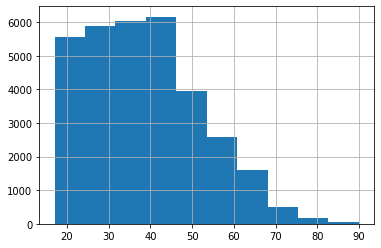

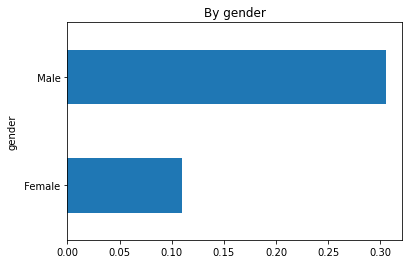

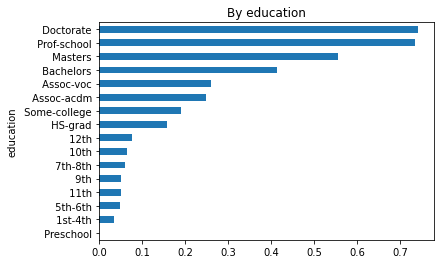

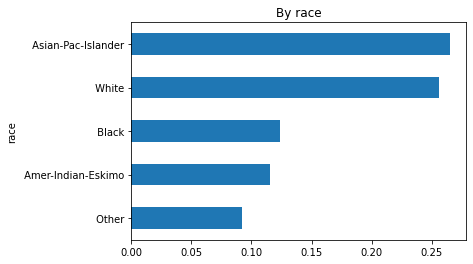

In [29]:
# Exercise 2

data.age.hist()

# plot by gender
data['income_bin'] = data.income == " >50K"
plt.figure()
plt.title("By gender")
grouped = data.groupby("gender")
grouped.income_bin.mean().plot.barh()

# plot by education
plt.figure()
plt.title("By education")
data.groupby("education").income_bin.mean().sort_values().plot.barh()

plt.figure()
plt.title("By race")
data.groupby("race").income_bin.mean().sort_values().plot.barh()




In [45]:

# Exercise 3
# using pd.get_dummies
data_one_hot = pd.get_dummies(data_features)
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# using OneHotEncoder
cont_features = data_features.dtypes == "int64"
ct = make_column_transformer((OneHotEncoder(), ~cont_features),
                             (StandardScaler(), cont_features))#use "passthrough" if want to do nothing
X_train, X_test, y_train, y_test = train_test_split(data_features, income)
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)


In [46]:

# Exercise 4
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_scaled, y_train)
print("Training score:", logreg.score(X_train_scaled, y_train))

print("Test score:", logreg.score(X_test_scaled, y_test))

print("Fraction <= 50k", (y_train.values == " <=50K").mean())

Training score: 0.850982800982801
Test score: 0.8560373418498956
Fraction <= 50k 0.7593775593775594


/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
